Davies-Bouldin Index: 1.1714695644070179


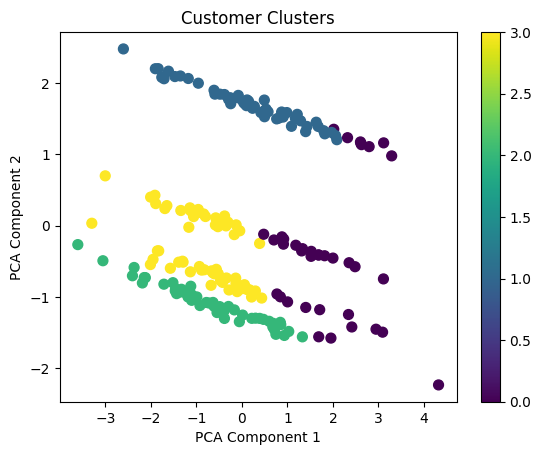

In [ ]:
# Merge Customer Profile for Clustering
clustering_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean',
    'Region': lambda x: x.mode()[0]  # Categorical to mode
}).reset_index()

# One-Hot Encoding for Region
clustering_data = pd.get_dummies(clustering_data, columns=['Region'], drop_first=True)

# Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.iloc[:, 1:])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add Cluster Labels
clustering_data['Cluster'] = clusters

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize Clusters (Using PCA for Dimensionality Reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()


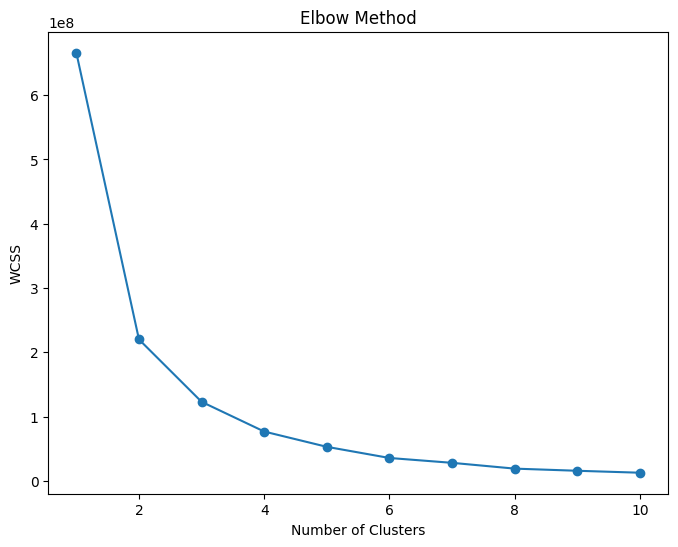

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit KMeans on numerical features only (excluding 'CustomerID')
    kmeans.fit(customer_profile.drop(columns=['CustomerID']))
    wcss.append(kmeans.inertia_)

# Plot WCSS (rest of the code remains the same)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Agglomerative Clustering DB Index: 1.4914829639976057


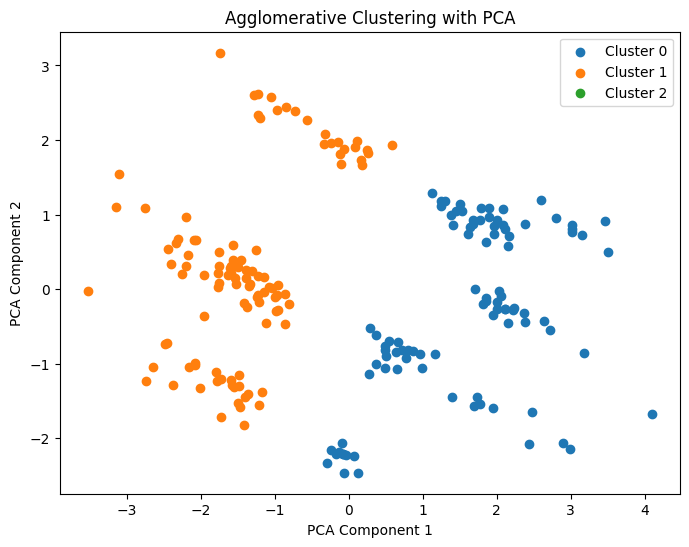

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data.iloc[:, 1:])
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_agg = agg_clustering.fit_predict(clustering_data.iloc[:, 1:])

# Add Cluster Labels
clustering_data['Cluster_Agg'] = labels_agg



# Calculate DB Index
db_index_agg = davies_bouldin_score(scaled_data, labels_agg)
print(f"Agglomerative Clustering DB Index: {db_index_agg}")

# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        reduced_data[labels_agg == cluster, 0],
        reduced_data[labels_agg == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Agglomerative Clustering with PCA")
plt.legend()
plt.show()


DBSCAN DB Index: 1.19890074910535


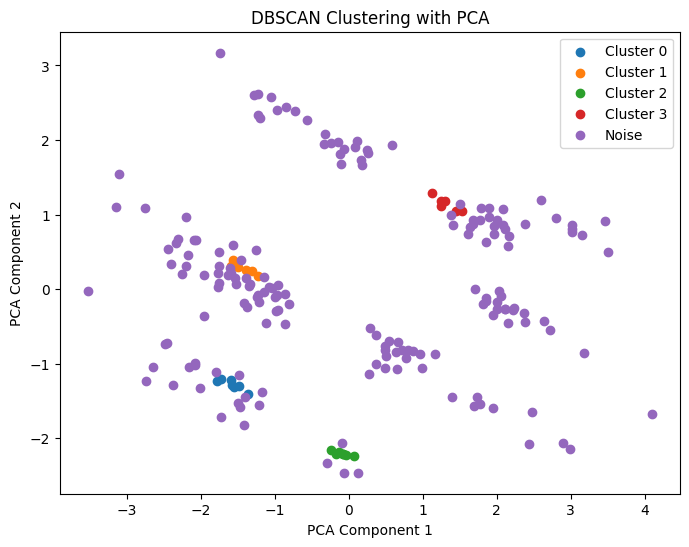

In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=6)  # Adjust eps and min_samples for better results
labels_dbscan = dbscan.fit_predict(scaled_data)

# Calculate DB Index (if clusters are formed)
if len(set(labels_dbscan)) > 1:
    db_index_dbscan = davies_bouldin_score(scaled_data, labels_dbscan)
    print(f"DBSCAN DB Index: {db_index_dbscan}")
else:
    print("DBSCAN did not form valid clusters.")

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
for cluster in set(labels_dbscan):
    plt.scatter(
        reduced_data[labels_dbscan == cluster, 0],
        reduced_data[labels_dbscan == cluster, 1],
        label=f"Cluster {cluster}" if cluster != -1 else "Noise"
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering with PCA")
plt.legend()
plt.show()


Gaussian Mixture Model DB Index: 1.1658593665718826


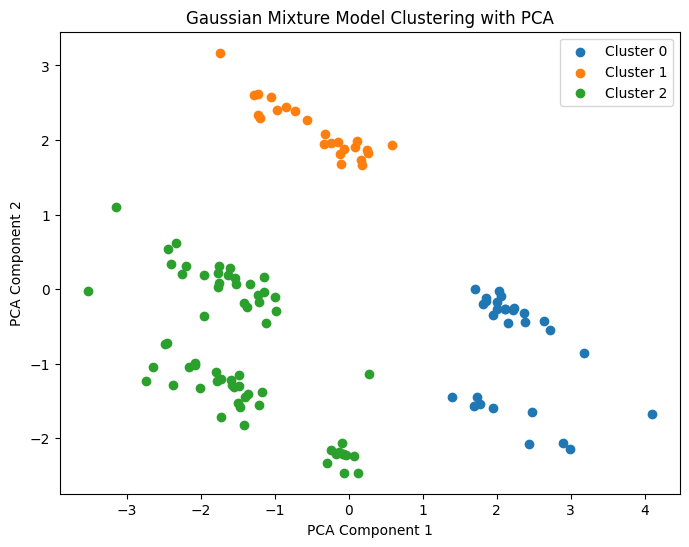

In [ ]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
labels_gmm = gmm.fit_predict(scaled_data)

# Calculate DB Index
db_index_gmm = davies_bouldin_score(scaled_data, labels_gmm)
print(f"Gaussian Mixture Model DB Index: {db_index_gmm}")

# Visualize GMM Clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        reduced_data[labels_gmm == cluster, 0],
        reduced_data[labels_gmm == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Gaussian Mixture Model Clustering with PCA")
plt.legend()
plt.show()
